<a href="https://colab.research.google.com/github/pjcroxas/ShortTermForecasting/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("drive/MyDrive/Research/Short-term Forecasting/data/Benchmark")

['ne-stn-weather-jan-2024.xlsx',
 'ne-stn-rsp-jan-march-2024.xlsx',
 'rsp_weather.xlsx']

In [ ]:
dir = "drive/MyDrive/Research/Short-term Forecasting/data/Benchmark"

In [ ]:
rsp_df = pd.read_excel(dir+'/ne-stn-rsp-jan-march-2024.xlsx')
weather_df = pd.read_excel(dir+'/ne-stn-weather-jan-2024.xlsx')

In [ ]:
rsp_df.head()

,Station,Date,Time Range,Entry,Exit,Weekday_Weekend,Year,Month,Time Index,Day,Calendar Day
0,North Edsa,2024-01-01,05:00 - 05:59,0,0,False,2024,1,5,2,1
1,North Edsa,2024-01-01,06:00 - 06:59,397,154,False,2024,1,6,2,1
2,North Edsa,2024-01-01,07:00 - 07:59,558,488,False,2024,1,7,2,1
3,North Edsa,2024-01-01,08:00 - 08:59,630,537,False,2024,1,8,2,1
4,North Edsa,2024-01-01,09:00 - 09:59,841,633,False,2024,1,9,2,1


In [ ]:
weather_df.head()

,time,temperature_2m (°C),showers (mm),Year,Time Index,Month,Day,Calendar Day
0,2024-01-01 00:00:00,26.5,0.0,2024,0,1,2,1
1,2024-01-01 01:00:00,27.7,0.0,2024,1,1,2,1
2,2024-01-01 02:00:00,29.1,0.0,2024,2,1,2,1
3,2024-01-01 03:00:00,30.2,0.0,2024,3,1,2,1
4,2024-01-01 04:00:00,30.9,0.0,2024,4,1,2,1


## Merge dataset

In [ ]:
weather_df.columns

Index(['time', 'temperature_2m (°C)', 'showers (mm)', 'Year', 'Time Index',
       'Month', 'Day', 'Calendar Day'],
      dtype='object')

In [ ]:
weather_split = weather_df[['temperature_2m (°C)', 'showers (mm)', 'Year','Time Index', 'Month', "Day", "Calendar Day"]]
rsp_weather = rsp_df.merge(weather_split, how="inner", on=["Year","Time Index", "Month", "Day", "Calendar Day"])

In [ ]:
rsp_weather

,Station,Date,Time Range,Entry,Exit,Weekday_Weekend,Year,Month,Time Index,Day,Calendar Day,temperature_2m (°C),showers (mm)
0,North Edsa,2024-01-01,05:00 - 05:59,0,0,False,2024,1,5,2,1,31.2,0.0
1,North Edsa,2024-01-01,06:00 - 06:59,397,154,False,2024,1,6,2,1,31.5,0.0
2,North Edsa,2024-01-01,07:00 - 07:59,558,488,False,2024,1,7,2,1,31.6,0.0
3,North Edsa,2024-01-01,08:00 - 08:59,630,537,False,2024,1,8,2,1,30.7,0.0
4,North Edsa,2024-01-01,09:00 - 09:59,841,633,False,2024,1,9,2,1,29.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,North Edsa,2024-03-27,18:00 - 18:59,2504,4897,False,2024,3,18,4,27,26.3,0.0
1693,North Edsa,2024-03-27,19:00 - 19:59,2430,3639,False,2024,3,19,4,27,26.3,0.0
1694,North Edsa,2024-03-27,20:00 - 20:59,2255,2297,False,2024,3,20,4,27,26.3,0.0
1695,North Edsa,2024-03-27,21:00 - 21:59,752,1845,False,2024,3,21,4,27,26.2,0.0


In [ ]:
rsp_weather.Date = pd.to_datetime(rsp_weather.Date)
rsp_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Station              1697 non-null   object        
 1   Date                 1697 non-null   datetime64[ns]
 2   Time Range           1697 non-null   object        
 3   Entry                1697 non-null   int64         
 4   Exit                 1697 non-null   int64         
 5   Weekday_Weekend      1697 non-null   bool          
 6   Year                 1697 non-null   int64         
 7   Month                1697 non-null   int64         
 8   Time Index           1697 non-null   int64         
 9   Day                  1697 non-null   int64         
 10  Calendar Day         1697 non-null   int64         
 11  temperature_2m (°C)  1697 non-null   float64       
 12  showers (mm)         1697 non-null   float64       
dtypes: bool(1), datetime64[ns](1), fl

In [ ]:
rsp_weather["datetime"] = rsp_weather["Date"] + pd.to_timedelta(rsp_weather["Time Index"], unit="h")
rsp_weather.head()

,Station,Date,Time Range,Entry,Exit,Weekday_Weekend,Year,Month,Time Index,Day,Calendar Day,temperature_2m (°C),showers (mm),datetime
0,North Edsa,2024-01-01,05:00 - 05:59,0,0,False,2024,1,5,2,1,31.2,0.0,2024-01-01 05:00:00
1,North Edsa,2024-01-01,06:00 - 06:59,397,154,False,2024,1,6,2,1,31.5,0.0,2024-01-01 06:00:00
2,North Edsa,2024-01-01,07:00 - 07:59,558,488,False,2024,1,7,2,1,31.6,0.0,2024-01-01 07:00:00
3,North Edsa,2024-01-01,08:00 - 08:59,630,537,False,2024,1,8,2,1,30.7,0.0,2024-01-01 08:00:00
4,North Edsa,2024-01-01,09:00 - 09:59,841,633,False,2024,1,9,2,1,29.8,0.0,2024-01-01 09:00:00


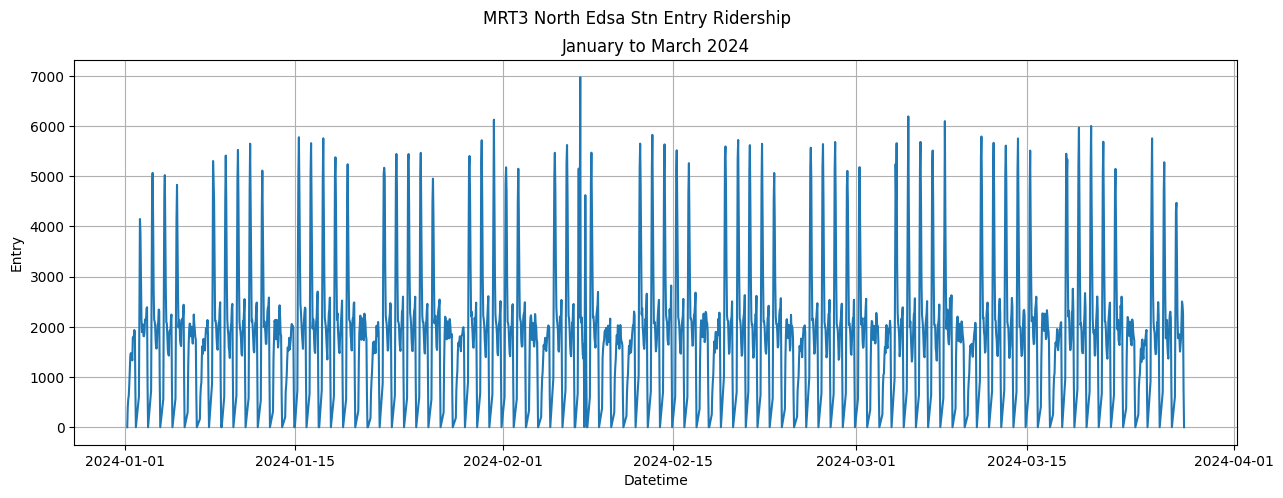

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="datetime", y="Entry", data=rsp_weather)
plt.xlabel("Datetime")
plt.ylabel("Entry")
plt.suptitle("MRT3 North Edsa Stn Entry Ridership")
plt.title("January to March 2024")
plt.grid()
plt.show()

In [ ]:
from datetime import datetime as dt
# rsp_weather['datetime'] = pd.to_datetime(rsp_weather['datetime'])

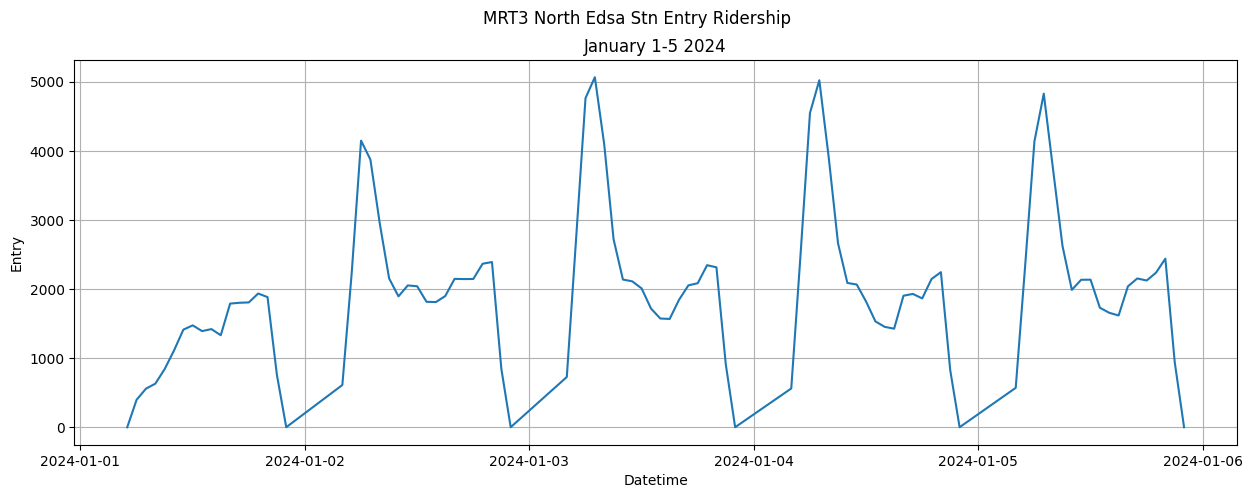

In [ ]:
range_ = rsp_weather[(rsp_weather['datetime']>='2024-01-01 05:00:00') & (rsp_weather['datetime']<='2024-01-05 22:00:00')]
plt.figure(figsize=(15, 5))
sns.lineplot(x="datetime",
             y="Entry",
             data=range_)

plt.xlabel("Datetime")
plt.ylabel("Entry")
plt.suptitle("MRT3 North Edsa Stn Entry Ridership")
plt.title("January 1-5 2024")
plt.grid()
plt.show()

In [ ]:
rsp_weather.to_excel(dir+"/rsp_weather.xlsx", index=False)

In [ ]:
--fail

NameError: name 'fail' is not defined

In [ ]:
sns.kdeplot(rsp_weather,
            x="Entry",
            hue="Month",
            multiple='stack')

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="datetime", y="Exit", data=rsp_weather, color="red")
plt.xlabel("Datetime")
plt.ylabel("Exit")
plt.suptitle("MRT3 North Edsa Stn Exit Ridership")
plt.title("January to March 2024")
plt.grid()
plt.show()

In [ ]:
range_ = rsp_weather[(rsp_weather['datetime']>='2024-01-01 05:00:00') & (rsp_weather['datetime']<='2024-01-05 22:00:00')]
plt.figure(figsize=(15, 5))
sns.lineplot(x="datetime",
             y="Exit",
             data=range_,
             color="red")

plt.xlabel("Datetime")
plt.ylabel("Entry")
plt.suptitle("MRT3 North Edsa Stn Entry Ridership")
plt.title("January 1-5 2024")
plt.grid()
plt.show()

In [ ]:
sns.kdeplot(rsp_weather,
            x="Exit",
            hue="Month",
            multiple='stack')

In [ ]:
# Drop zeroes in entry and exit
rsp_weather = rsp_weather[rsp_weather["Entry"] != 0]
rsp_weather = rsp_weather[rsp_weather["Exit"] != 0]

In [ ]:
# min-max scaling entry and exit
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rsp_weather[["Entry", "Exit"]] = scaler.fit_transform(rsp_weather[["Entry", "Exit"]])

In [ ]:
sns.kdeplot(rsp_weather,
            x="Exit",
            hue="Month",
            multiple='stack')

--------------------------------- *Code Ends here* -----------------------------------

In [ ]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Lambda
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD

In [ ]:
rsp_weather.columns

In [ ]:
--fail

In [ ]:
rsp_only = rsp_weather[['Year', 'Month', 'Time Index', 'Day', 'Calendar Day',"Entry", "Exit"]]
rsp_with_weather = rsp_weather[['Year', 'Month', 'Time Index', 'Day', 'Calendar Day',
       'temperature_2m (°C)', 'showers (mm)',"Entry", "Exit"]]

In [ ]:
# Split first 70% and last 30%
def split_data(data):
  train_size = int(len(rsp_only) * 0.7)

  train_data = data[:train_size]
  # Split X, y_entry, y _exit
  # shuffled = train_data.sample(frac=1)
  X_train = train_data.drop(['Entry', 'Exit'], axis=1)
  y_train_entry = train_data['Entry']
  y_train_exit = train_data['Exit']

  test_data = data[train_size:]
  # Split X_test, y_test_entry, y_test_exit
  X_test = test_data.drop(['Entry', 'Exit'], axis=1)
  y_test_entry = test_data['Entry']
  y_test_exit = test_data['Exit']

  return X_train, X_test, y_train_entry, y_train_exit, y_test_entry, y_test_exit

In [ ]:
# Split data for timeseries only
X_train, X_test, y_train_entry, y_train_exit, y_test_entry, y_test_exit = split_data(rsp_only)

In [ ]:
X_train

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train_entry.shape)
print(y_train_exit.shape)

print(y_test_entry.shape)
print(y_test_exit.shape)

In [ ]:
# # Build Simple LSTM
# # 50 Neuron

# model = Sequential()
# model.add(LSTM(30, activation='relu', input_shape=(X_train.shape[1], 1)))
# # model.add(LSTM(64)),
# model.add(Dense(30, activation="relu")),
# model.add(Dense(10, activation="relu")),
# model.add(Dense(1)),
# model.add(Lambda(lambda x: x * 400))
# model.compile(optimizer='adam', loss='mse')

### Build Model

In [ ]:
# X_train

In [ ]:
# model = Sequential([
#     LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
#     Dense(30, activation="relu"),
#     Dense(10, activation="relu"),
#     Dense(1),
#     Lambda(lambda x: x * 400)
# ])

# model.compile(optimizer='adam', loss='mse')

In [ ]:
def create_model(input_shape):
    model = Sequential([
        LSTM(100, activation='relu', input_shape=input_shape),
        Dense(30, activation="relu"),
        Dense(10, activation="relu"),
        Dense(1),
        Lambda(lambda x: x * 400)
    ])

    model.compile(loss='mae',
                  optimizer="adam")
    return model

In [ ]:
# Create four baseline model
model_timeseries_entry = create_model((X_train.shape[1], 1))
model_timeseries_exit = create_model((X_train.shape[1], 1))
model_rsp_entry = create_model((X_train.shape[1], 1))
model_rsp_exit = create_model((X_train.shape[1], 1))

In [ ]:
model_timeseries_entry.summary()

### Train Model

In [ ]:
history = model_timeseries_entry.fit(X_train,
                          y_train_entry,
                          epochs=100,
                          batch_size=70,
                          validation_data=(X_test, y_test_entry),
                          verbose=2,
                          shuffle=False)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.suptitle('Model loss: Ridership Entry')
plt.title("Time-series only")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
history = model_timeseries_exit.fit(X_train,
                          y_train_exit,
                          epochs=50,
                          batch_size=70,
                          validation_data=(X_test, y_test_exit),
                          verbose=2,
                          shuffle=False)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Ridership with Weather

In [ ]:
X_train, X_test, y_train_entry, y_train_exit, y_test_entry, y_test_exit = split_data(rsp_with_weather)

In [ ]:
history = model_rsp_entry.fit(X_train,
                          y_train_entry,
                          epochs=100,
                          batch_size=70,
                          validation_data=(X_test, y_test_entry),
                          verbose=2,
                          shuffle=False)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
history = model_rsp_exit.fit(X_train,
                          y_train_exit,
                          epochs=100,
                          batch_size=20,
                          validation_data=(X_test, y_test_exit),
                          verbose=2,
                          shuffle=False)

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()